# <center> Sales Analysis <center>



#### Import Necessary Libraries

In [1]:
import pandas as pd
import os

In [221]:
import warnings
warnings.filterwarnings('ignore')

#### Merge the 12 months of sales data into a single CSV file

In [2]:
df_april = pd.read_csv("./SalesAnalysis/Sales_Data/Sales_April_2019.csv")

In [3]:
df_april.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


In [4]:
all_files = [file for file in os.listdir('./SalesAnalysis/Sales_Data')]

In [5]:
for file in all_files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [6]:
all_data = pd.DataFrame()

In [7]:
for file in all_files:
    current_df = pd.read_csv("./SalesAnalysis/Sales_Data/" + file)
    all_data = pd.concat([all_data, current_df])

In [8]:
all_data.to_csv("combined_data.csv", index=False)

#### Read updated dataframe

In [9]:
all_data = pd.read_csv("combined_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [10]:
all_data.reset_index(inplace=True)
all_data.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Clean Up the Data!

In [11]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,1,NaN,NaN,NaN,NaN,NaN,NaN
356,356,NaN,NaN,NaN,NaN,NaN,NaN
735,735,NaN,NaN,NaN,NaN,NaN,NaN
1433,1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,1553,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
all_data = all_data.dropna()

In [22]:
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [ ]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

##### Convert columns to correct data type

In [36]:
all_data.loc[:, 'Quantity Ordered'] = pd.to_numeric(all_data.loc[:,'Quantity Ordered'])
all_data.loc[:,'Price Each'] = pd.to_numeric(all_data.loc[:,'Price Each'])

#### Augment data with additional columns

#### Add Month Column

In [19]:
all_data

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...,...
186845,186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [33]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32');
all_data.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add a sales column

In [46]:
all_data.loc[:,'Sales'] = all_data.loc[:,'Quantity Ordered'] * all_data.loc[:,'Price Each']

In [47]:
all_data.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Add a city column

In [62]:
def get_city(address):
    return address.split(',')[1]

In [74]:
all_data.loc[:,'City'] = all_data.loc[:,'Purchase Address'].apply(lambda x: get_city(x))

In [75]:
all_data.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [77]:
def get_state(address):
    return address.split(',')[2].split(' ')[1]

In [85]:
all_data.loc[:,'City'] = all_data.loc[:,'Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

In [86]:
all_data.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


###### Q1. What was the best month for sale? How much was earned that month? 

In [52]:
result = all_data.groupby('Month').sum()[['Quantity Ordered', 'Sales']]

In [55]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (14, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
display: table-cell;
text-align: center;
vertical-align: middle;
}
</style>
""")

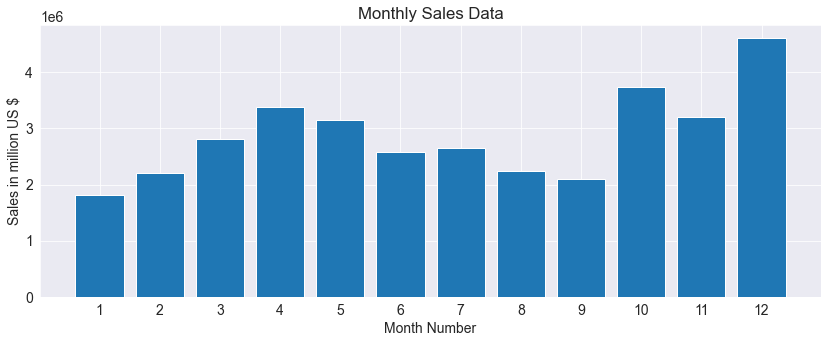

In [98]:
months = range(1,13)

plt.bar(months, result['Sales'])
plt.xticks(months)
plt.ylabel('Sales in million US $')
plt.xlabel('Month Number')
plt.title('Monthly Sales Data')
plt.show();

###### Q2. Which city had the highest Sales? 

In [88]:
result_city = all_data.groupby('City').sum()

In [89]:
result_city

,index,Quantity Ordered,Price Each,Month,Sales
City,,,,,
Atlanta (GA),1389170518,16602,2.779908e+06,104794,2.795499e+06
Austin (TX),924331831,11153,1.809874e+06,69829,1.819582e+06
Boston (MA),1873552039,22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),1396143959,16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),2768528105,33289,5.421435e+06,208325,5.452571e+06
New York City (NY),2314885097,27932,4.635371e+06,175741,4.664317e+06
Portland (ME),227138721,2750,4.471893e+05,17144,4.497583e+05
Portland (OR),935485289,11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),4164325906,50239,8.211462e+06,315520,8.262204e+06


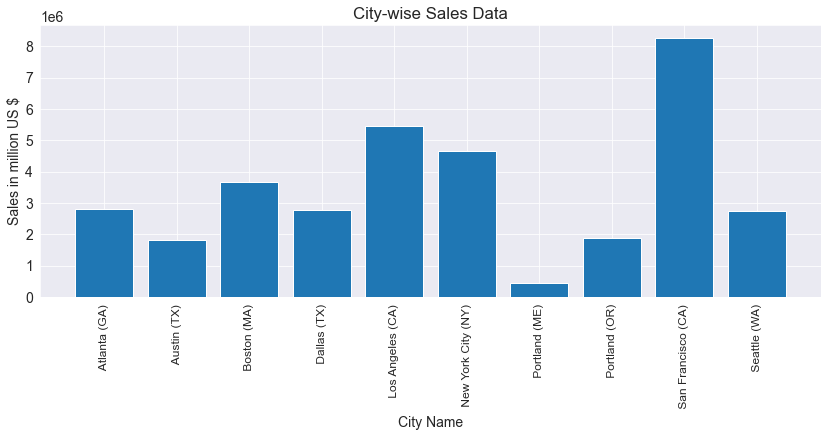

In [181]:
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, result_city['Sales'])
plt.xticks(cities, rotation='vertical', size=12)
plt.ylabel('Sales in million US $')
plt.xlabel('City Name')
plt.title('City-wise Sales Data')
plt.show()

###### Q3. What time should we display the advertisement to maximize the likelihood of customer's buying product? 

In [102]:
all_data.loc[:, 'Order Date'] = pd.to_datetime(all_data.loc[:, 'Order Date'])

In [103]:
all_data.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [119]:
all_data.loc[:, 'Hour'] = all_data.loc[:, 'Order Date'].dt.hour
all_data.loc[:, 'Minute'] = all_data.loc[:, 'Order Date'].dt.minute

In [120]:
all_data.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


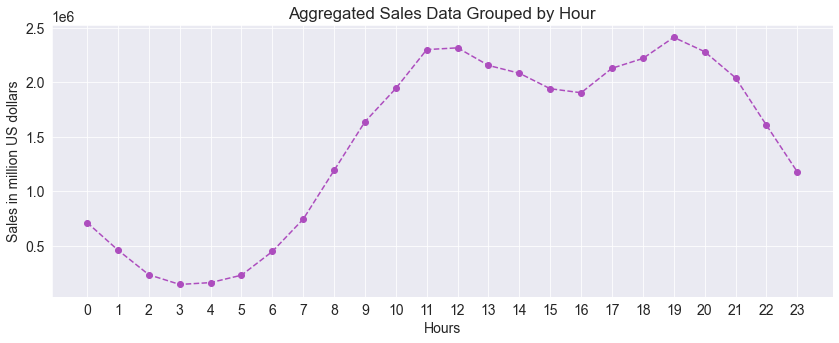

In [146]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby('Hour').sum().Sales, linestyle = '--', marker = 'o', color = '#AD4DBE')
plt.xlabel('Hours')
plt.xticks(hours)
plt.ylabel('Sales in million US dollars')
plt.title("Aggregated Sales Data Grouped by Hour");

###### Q4. Which products are most often sold together?

In [151]:
sold_df = all_data[all_data['Order ID'].duplicated(keep=False)]

In [157]:
sold_df.loc[:, 'Grouped'] = sold_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [158]:
sold_df.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
3,3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
4,4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
18,18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
19,19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
30,30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [161]:
sold_df = sold_df[['Order ID', 'Grouped']].drop_duplicates()

In [164]:
sold_df.head(100)

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
2662,179108,"Lightning Charging Cable,AAA Batteries (4-pack)"
2683,179128,"iPhone,Apple Airpods Headphones"
2718,179162,"Google Phone,USB-C Charging Cable"
2783,179226,"34in Ultrawide Monitor,Macbook Pro Laptop"


In [165]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in sold_df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

In [166]:
for key, value in count.most_common(10):
    print(key, ' : ', value)

('iPhone', 'Lightning Charging Cable')  :  1005
('Google Phone', 'USB-C Charging Cable')  :  987
('iPhone', 'Wired Headphones')  :  447
('Google Phone', 'Wired Headphones')  :  414
('Vareebadd Phone', 'USB-C Charging Cable')  :  361
('iPhone', 'Apple Airpods Headphones')  :  360
('Google Phone', 'Bose SoundSport Headphones')  :  220
('USB-C Charging Cable', 'Wired Headphones')  :  160
('Vareebadd Phone', 'Wired Headphones')  :  143
('Lightning Charging Cable', 'Wired Headphones')  :  92


*Shop Owners can give special deals on these combo of items since people often purchase these items together. Thus, to lure in a bigger adudience to boost the sales, combo deals on these items would give the business an edge over others.*

###### Q5. What product sold the most? Why do you think that it was the top-selling product?

In [190]:
product_group = all_data.groupby('Product').sum()

In [191]:
quantity_max = product_group['Quantity Ordered']
quantity_max

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

In [201]:
products = [product for product, df in all_data.groupby('Product')]

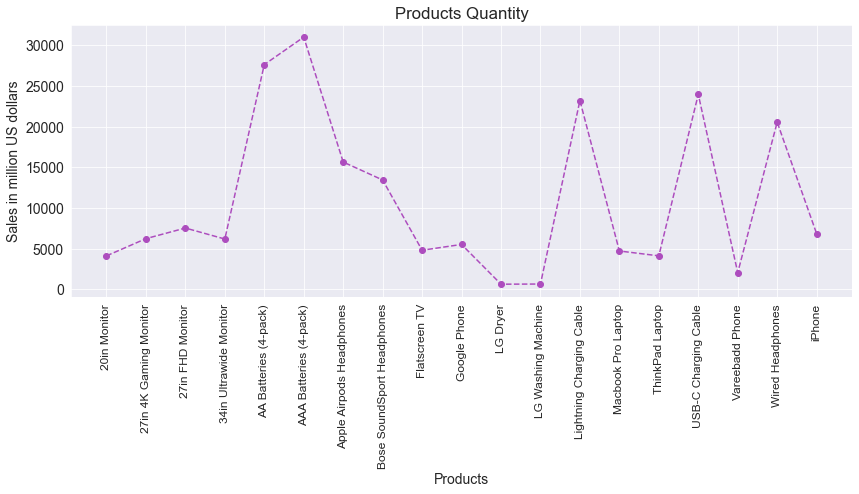

In [203]:
plt.plot(products, quantity_max, linestyle = '--', marker = 'o', color = '#AD4DBE')
plt.xlabel('Products')
plt.xticks(products, rotation='vertical', size=12)
plt.ylabel('Sales in million US dollars')
plt.title("Products Quantity");

In [210]:
prices = all_data.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

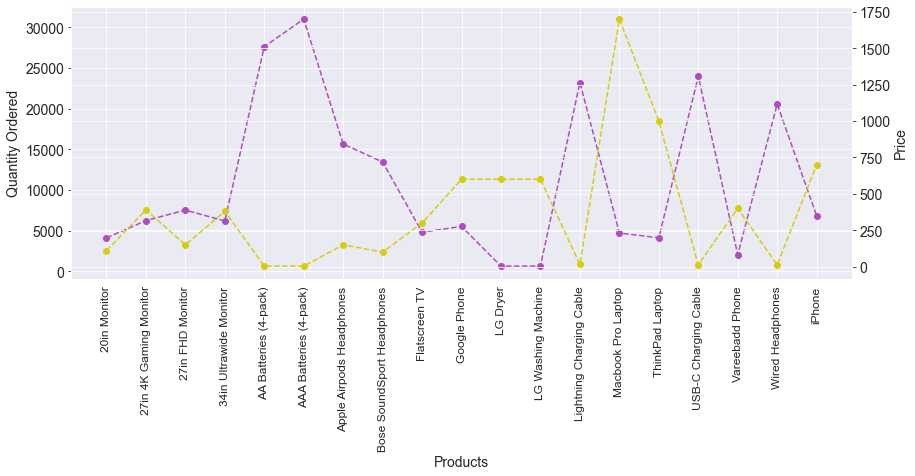

In [222]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(products, quantity_max, linestyle = '--', marker = 'o', color = '#AD4DBE')
ax2.plot(products, prices, linestyle = '--', marker = 'o', color = '#D5CD10')
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Price')
ax1.set_xticklabels(products, rotation='vertical', size=12)
plt.show();